# Uczenie maszynowe - Projekt
## Klasyfikacja obrazów cyfr przy użyciu biblioteki Keras

* Dominik Dmowski - 222424

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline
np.random.seed(0)

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shapes of training dataset: ", x_train.shape, y_train.shape)
print("Shapes of test dataset: ", x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Shapes of training dataset:  (60000, 28, 28) (60000,)
Shapes of test dataset:  (10000, 28, 28) (10000,)


### Wizualizacja przykładowych obrazów z biblioteki MNIST

Przykładowe obrazy z datasetu MNIST


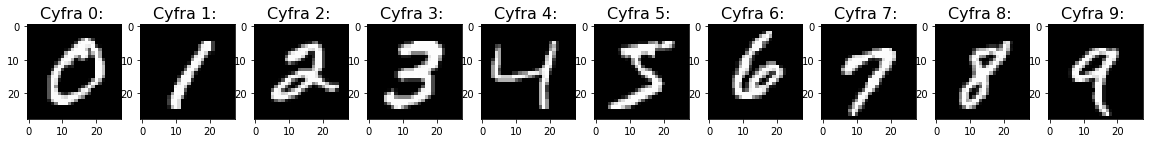

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize = (20,20))

print("Przykładowe obrazy z datasetu MNIST")
for i in range (0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Cyfra {}: ".format(i), fontsize = 16)


## Zamiana etykiet z cyfr na wektory

In [ ]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Przygotowanie danych 

In [ ]:
# Normalizacja danych wejsciowych
x_train = x_train / 255
x_test = x_test / 255

# Zmiana wymiarowosci danych wejsciowych
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

## Tworzenie modelu uczenia maszynowego

In [ ]:
model = Sequential()

model.add(Dense(units=256, input_shape=(784,), activation = 'relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


## Trenowanie opracowanego modelu

In [ ]:
batch_size = 512 #liczba danych na wejsciu modelu
epochs = 10 #liczba epok modelu
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

#przy kazdej nastepnej iteracji epoki wyuczonego modelu wartosci funkcji straty spada przy jednoczesnym wzroscie dokladnosci

Epoch 1/10
118/118 [==============================] - 4s 21ms/step - loss: 0.4456 - accuracy: 0.8740
Epoch 2/10
118/118 [==============================] - 2s 19ms/step - loss: 0.1647 - accuracy: 0.9522
Epoch 3/10
118/118 [==============================] - 1s 13ms/step - loss: 0.1131 - accuracy: 0.9666
Epoch 4/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0830 - accuracy: 0.9751
Epoch 5/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0662 - accuracy: 0.9803
Epoch 6/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0523 - accuracy: 0.9842
Epoch 7/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0416 - accuracy: 0.9876
Epoch 8/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0340 - accuracy: 0.9901
Epoch 9/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0285 - accuracy: 0.9914
Epoch 10/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0235 - accura

## Walidacja danych

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss: {}\nTest accuracy: {}".format(round(test_loss,4), round(test_acc,4)))

313/313 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9829
Test loss: 0.0618
Test accuracy: 0.9829


In [ ]:
# 'reczna' walidacja

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 1ms/step
[[4.5890150e-07 3.7737732e-07 7.2810476e-06 ... 9.9992245e-01
  3.1351721e-07 8.8236739e-06]
 [1.1361964e-08 1.2290838e-06 9.9999708e-01 ... 4.9022169e-09
  1.6171610e-07 9.1645780e-12]
 [1.4327038e-06 9.9979854e-01 3.5117922e-05 ... 9.6294665e-05
  1.7588853e-05 8.6193808e-08]
 ...
 [6.3444597e-11 5.8517763e-10 3.4000647e-12 ... 4.1158196e-07
  4.1201574e-08 3.4373763e-06]
 [1.6822040e-09 3.4539882e-10 2.8434163e-11 ... 3.3045430e-10
  1.6751157e-05 4.5043000e-10]
 [4.0535809e-07 9.0723408e-11 1.4934971e-08 ... 3.0722753e-12
  1.9191774e-08 5.5555505e-11]]
[7 2 1 ... 4 5 6]


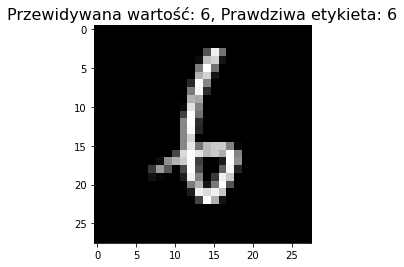

In [ ]:
# 'reczna' walidacja na losowym przykladzie z proby

random_indx = np.random.choice(len(x_test))
x_sample = x_test[random_indx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_indx]
y_sample_pred_class = y_pred_classes[random_indx]

plt.title("Przewidywana wartość: {}, Prawdziwa etykieta: {}". format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

## Macierz konfuzji

Text(0.5, 1.0, 'Macierz konfuzji')

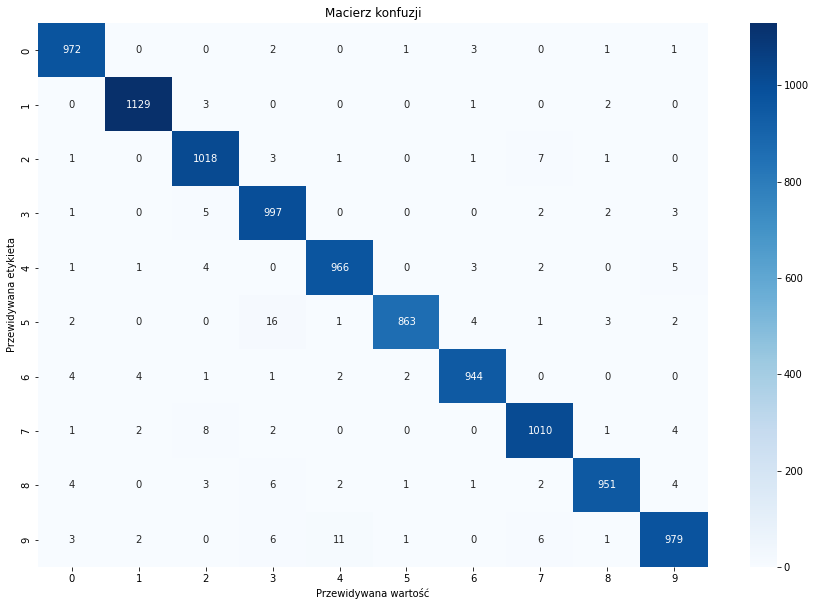

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt='d', ax = ax, cmap = 'Blues')
ax.set_xlabel('Przewidywana wartość')
ax.set_ylabel('Przewidywana etykieta')
ax.set_title('Macierz konfuzji')


## Śledzenie błędów modelu

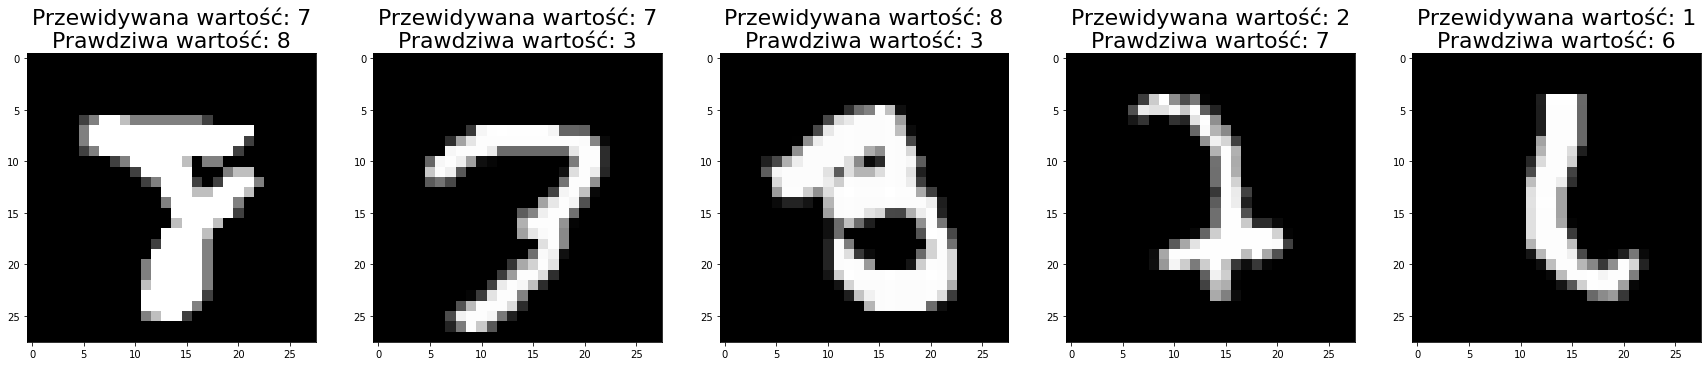

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

#szukanie błędów o najwyższej wartości prawdopodobieństwa
y_pred_errors_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# ustawienie blokow bledow w kolejnosci najmniejszej zgodnosci prawdopodobienstwa
sorted_indx_diff_errors = np.argsort(diff_errors_pred_true)
top_indx_diff_error = sorted_indx_diff_errors[-5:]

# wyświetlenie wyliczonych najczęstszych błędów
num = len(top_indx_diff_error)
f, ax = plt.subplots(1, num, figsize=(30,30))
for i in range (0, num):
  indx = top_indx_diff_error[i]
  sample = x_test_errors[indx].reshape(28,28)
  y_t = y_true_errors[indx]
  y_p = y_pred_classes_errors[indx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Przewidywana wartość: {}\nPrawdziwa wartość: {}".format(y_p, y_t), fontsize = 22)

## Zapisywanie i eksport modelu


In [ ]:
model.save("my_model.h5")